In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

train_percent = 0.4  # To be modified
valid_percent = 0.1  # To be modified

# Modify the data location for loading data
data = np.loadtxt('./data.csv', unpack=True, delimiter=',',skiprows=0)
data = np.transpose(data)
data

array([[ 1.4289 ,  4.3156 ],
       [ 1.2643 ,  6.6349 ],
       [-1.362  ,  0.95923],
       ...,
       [ 1.337  ,  5.8648 ],
       [ 1.0654 ,  7.2634 ],
       [-0.80376,  3.0365 ]])

In [2]:
# Write a code for acquiring unbiased data
#Obtaining Training data set
train_set = data[0:int(len(data)*train_percent)]
train_set = sorted(train_set, key=lambda train_set: train_set[0]) # Sorting again for data in order
train_set = np.transpose(train_set)
train_set

array([[-1.4991 , -1.4906 , -1.4888 , ...,  2.4595 ,  2.4648 ,  2.4937 ],
       [-0.91638, -1.8278 , -1.0039 , ...,  5.5696 ,  5.9354 ,  7.4315 ]])

In [3]:
train_set.shape

(2, 800)

In [4]:
test_set = data[int(len(data)*train_percent):]
test_set = sorted(test_set, key=lambda test_set: test_set[0]) # Sorting again for data in order
test_set = np.transpose(test_set)

#Write code for obtaining test data set :test_set
test_x, test_y = test_set
test_x, test_y

(array([-1.4987, -1.496 , -1.4947, ...,  2.4875,  2.4875,  2.4927]),
 array([-2.999 , -1.9354, -1.2466, ...,  5.5458,  5.4378,  6.407 ]))

In [5]:
test_set.shape

(2, 1200)

In [6]:
from sklearn.model_selection import train_test_split

#Reallocate for efficient programming
train_x = train_set[0]  #train_set[0] : feature data set (i.e, x)
train_y = train_set[1] #train_set[1] : lable data set (i.e, y)

#Write code for obtaining valid data set : valid_set
tn_x, valid_x, tn_y, valid_y = train_test_split(train_x, train_y, test_size=valid_percent, random_state=0) 
tn_x.shape, tn_y.shape, valid_x.shape, valid_y.shape

((720,), (720,), (80,), (80,))

In [7]:
##################### Regression Libraries #############
def fit_polynomial(x,y , degree):
    '''
    Fits a polynomial to the input sample.
    (x,y): input sample
    degree: polynomial degree
    '''
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):
    '''
    Evaluates a linear regression model in an input sample
    model: linear regression model
    x: input sample
    '''
    degree = model.coef_.size - 1
    y = model.predict(np.vander(x, degree + 1))
    return y
##################### End of Regression Libraries #############

In [7]:
from sklearn.metrics import mean_squared_error as MSE
# Starting values
Optimal_Order = 0
Minimum_MSE = 9999
Optimal_Model = None

# Determine minimum MSE for valid set as increasing polynomial order from 1 to 10.
for polynomial_order in range(1,10) :
#     tt_x, vf_x, tt_y, vf_y = train_test_split(train_x, train_y, test_size=0.1, random_state=0) 
    model = fit_polynomial( tn_x, tn_y, polynomial_order )
    estimated_valid_y = apply_polynomial(model, valid_x)

   # Write codes measuring MSE for valid set
   # For calculating MSE use the library "mean_squared_error" in "sklearn.metrics"
    mse_score = MSE(valid_y, estimated_valid_y)
    if Minimum_MSE > mse_score:
        Optimal_Order = polynomial_order
        Minimum_MSE = mse_score
        Optimal_Model = model

print("----------------------","\n")
print("We can choose best polynomial order with MSE of validation set.")
print("Optimal order is ", Optimal_Order)
print("Minimum MSE is ", Minimum_MSE)
print("\n")
print("-----TEST RESULT-----")

#Overlay Regression polynomial along training feature data and test data set (test_x, test,y)
plt.plot(train_x, apply_polynomial(Optimal_Model, train_x),'g')   # Display with lines colored with green (g).
# plt.plot(test_x, test_y, 'b.') # Display with dots colored with blue (b).

NameError: name 'fit_polynomial' is not defined

In [8]:
plt.plot(train_x, apply_polynomial(Optimal_Model, train_x),'g')   # Display with lines colored with green (g).
plt.plot(test_x, test_y, 'b.') # Display with dots colored with blue (b).

NameError: name 'plt' is not defined

MSE :  24.18656056578064
The coefficient of model is  [ 0.0178492  -0.05788146 -0.11434674  0.44284242  1.19268093 -3.05024785
 -3.09167236  3.91202611  4.05678992  0.        ] ,   4.788984524916248


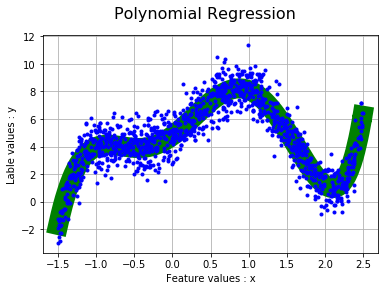

In [24]:
#Write code for calculating MSE performance of the Optimal regression polynomial.
MSE_Performance = MSE(test_x, test_y)
print("MSE : ", MSE_Performance)

print("The coefficient of model is ",Optimal_Model.coef_,",  ",Optimal_Model.intercept_)

plt.xlabel('Feature values : x')
plt.ylabel('Lable values : y')
plt.grid()

# added code =============== 
plt.plot(test_x, apply_polynomial(Optimal_Model, test_x),'g', linewidth=10.0)   # Display with lines colored with green (g).
plt.plot(test_x, test_y, 'b.') # Display with dots colored with blue (b).
# ========================== 

plt.suptitle('Polynomial Regression',fontsize=16)
plt.show()